In [1]:
import pandas as pd
import numpy as np
from caits.loading import csv_loader_regression
from caits.dataset import RegressionDataset
from caits.transformers import RegressionFeatureExtractor, RegressionFunctionTransformer
from caits.preprocessing import normalize_signal
from caits.filtering import filter_butterworth
from caits.fe import median_value
from sklearn.pipeline import Pipeline
from caits.visualization import plot_signal

In [2]:
data = csv_loader_regression("../examples/data/AirQuality.csv", X_cols=["C6H6(GT)", "NOx(GT)"], y_cols=[ "PT08.S4(NO2)" ,"PT08.S1(CO)"], sep=";", decimal=",")

rgr_data = RegressionDataset(**data)
rgr_data

rgr_data.X = rgr_data.X.fillna(0)
rgr_data.y = rgr_data.y.fillna(0)


In [3]:
normalize_tr = RegressionFunctionTransformer(normalize_signal)
butterworth_tr = RegressionFunctionTransformer(filter_butterworth, fs=100, filter_type="lowpass", cutoff_freq=0.5)
median_value_tr = RegressionFunctionTransformer(median_value)

test_pipeline = Pipeline([
    ("normalize", normalize_tr),
    ("butterworth", butterworth_tr),
])


In [4]:
transformed = test_pipeline.fit_transform(rgr_data)

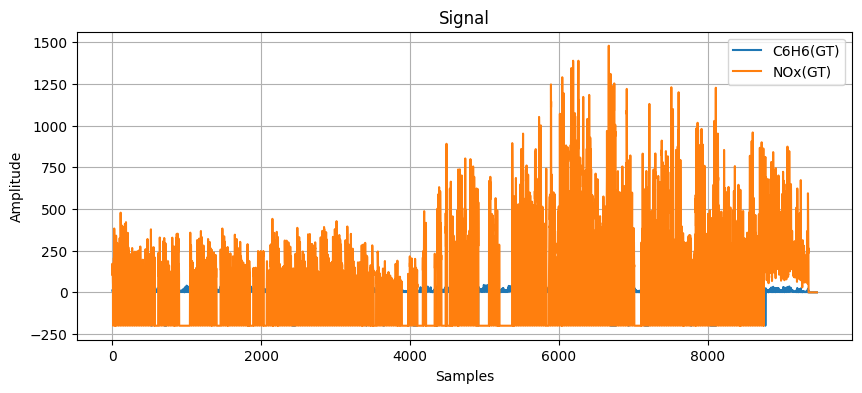

In [5]:
fig = plot_signal(rgr_data.X.values, channels=list(rgr_data.X.columns))

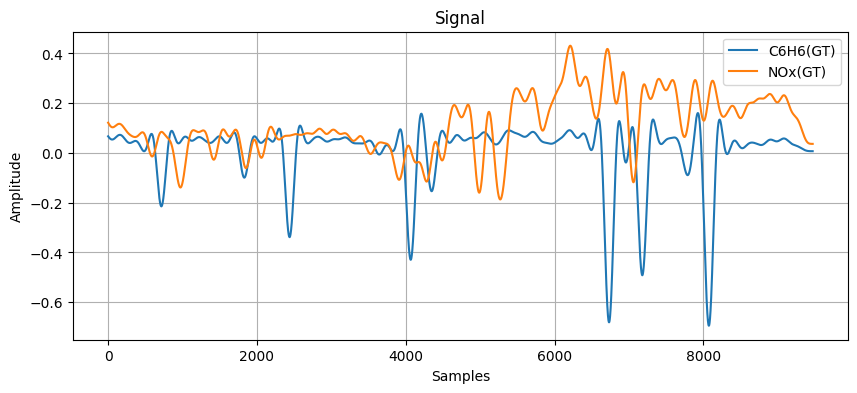

In [6]:
fig = plot_signal(transformed.X.values, channels=list(transformed.X.columns))

In [7]:
rfe = RegressionFeatureExtractor([
    {
        "func": normalize_signal,
        "params": {}
    },
    {
        "func": filter_butterworth,
        "params": {
            "fs": 100,
            "filter_type": "lowpass",
            "cutoff_freq": 0.5
        }
    }
])

In [8]:
rfe.fit_transform(rgr_data)

ValueError: All input lists must have the same length. (len(X) = 2, len(y) = 9471)